<a href="https://colab.research.google.com/github/shubhpachauri/berthless/blob/master/covid_ct_scan_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
    !wget https://www.dropbox.com/s/1et42066ydpz7e8/covid_19.zip?dl=0

--2021-06-10 16:53:23--  https://www.dropbox.com/s/1et42066ydpz7e8/covid_19.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6030:18::a27d:5012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1et42066ydpz7e8/covid_19.zip [following]
--2021-06-10 16:53:23--  https://www.dropbox.com/s/raw/1et42066ydpz7e8/covid_19.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucce90ca0e69f667a441a333822e.dl.dropboxusercontent.com/cd/0/inline/BQJAGvGzk3QhLJCVDiPvJAei25H4ySauqAsBBtbwkE0WHV97JUHqGspnj8z0DmtWkYtvCryOXktOQCQh0gIQ3nMB87ab4pkEQRHeetLVybaECl4bMvItTonra6miuR9XmC6VmP7NcnSGP4HVv1MhuRrg/file# [following]
--2021-06-10 16:53:24--  https://ucce90ca0e69f667a441a333822e.dl.dropboxusercontent.com/cd/0/inline/BQJAGvGzk3QhLJCVDiPvJAei25H4ySauqAsBBtbwkE0WHV97JUHqGspnj8z0DmtWkYtvCryOXktOQCQh0g

In [ ]:
!unzip covid_19.zip\?dl\=0

Archive:  covid_19.zip?dl=0
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import matplotlib as mlt
import keras 
from keras.layers import * 
from keras.models import * 
from keras.preprocessing import image


In [ ]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"

In [ ]:
# cnn model

model = Sequential()
#layer 1
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3))) 
#layer 2
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2))) 
model.add(Dropout(0.25))
#layer 3
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#layer 4
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1,activation='sigmoid'))

#compiling the model 
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# traning 
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    epochs = 15,
    validation_data = validation_generator,
    validation_steps=2
)


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
7/7 [==============================] - 12s 2s/step - loss: 0.7406 - accuracy: 0.5193 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/15
7/7 [==============================] - 9s 1s/step - loss: 0.6815 - accuracy: 0.5566 - val_loss: 0.6538 - val_accuracy: 0.9833
Epoch 3/15
7/7 [==============================] - 9s 1s/step - loss: 0.5036 - accuracy: 0.7871 - val_loss: 0.3810 - val_accuracy: 0.9833
Epoch 4/15
7/7 [==============================] - 9s 1s/step - loss: 0.2923 - accuracy: 0.8754 - val_loss: 0.3726 - val_accuracy: 0.9833
Epoch 5/15
7/7 [==============================] - 9s 1s/step - loss: 0.2078 - accuracy: 0.9192 - val_loss: 0.2124 - val_accuracy: 0.9833
Epoch 6/15
7/7 [==============================] - 9s 1s/step - loss: 0.1285 - accuracy: 0.9692 - val_loss: 0.1753 - val_accuracy: 0.9833
Epoch 7/15
7/7 [==============================] - 9s 1s/step - loss: 0.1175 - accuracy: 0.9453 - val_loss: 0.2236 - val_accuracy: 0.9833
Epoch 8/15
7/7 [========================

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os

In [ ]:
model.save("model_wgt1")

INFO:tensorflow:Assets written to: model_wgt1/assets


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.16438743472099304, 0.96875]

In [ ]:
model.evaluate_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.1334088295698166, 1.0]

In [ ]:
y_actual =[]  
y_test = []

for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
cm = confusion_matrix(y_actual,y_test)

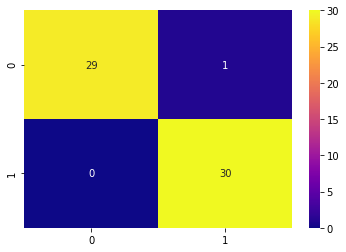

In [ ]:
sns.heatmap(cm,cmap="plasma",annot=True)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


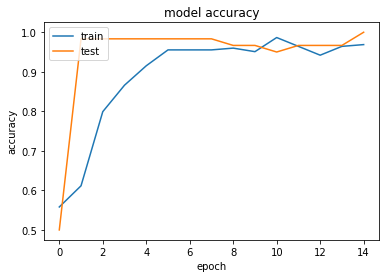

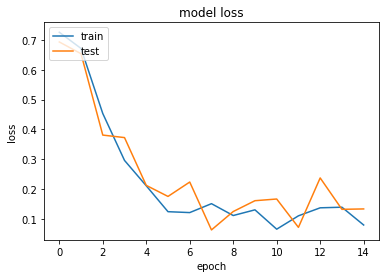

In [ ]:
import matplotlib.pyplot as plt

print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
